# DAT405 Introduction to Data Science and AI 
## 2022-2023, Reading Period 3
## (Resubmisson) Assignment 4: Spam classification using Naïve Bayes 
**Authors: *Niclas Lindmark, Anton Johansson, Noa Sjöstrand***

**Date: 24/2 - 2023**

This assignmetn has three obligatory questions which will be grades as PASS/FAIL. Questions 4-5 are optional and will not be graded, but can be interesting for students aiming for higher grades.

The exercise takes place in this notebook environment where you can chose to use Jupyter or Google Colabs. We recommend you use Google Colabs as it will facilitate remote group-work and makes the assignment less technical. 
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [1]:
## Download and extract data
## uncomment to download files
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
#!wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
#!tar -xjf 20021010_easy_ham.tar.bz2
#!tar -xjf 20021010_hard_ham.tar.bz2
#!tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [2]:
#!ls -lah

### 1. Preprocessing: 
Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). 
1.	We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use easy_ham for quesions 1 and 2.


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns




In [4]:



hard_ham = os.listdir('hard_ham')
hard_ham_list = []
for x in hard_ham:
    with open('hard_ham/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    hard_ham_list.append(text)

spam = os.listdir('spam')
spam_list = []
for x in spam:
    with open('spam/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    spam_list.append(text)

easy_ham = os.listdir('easy_ham')
easy_ham_list = []
for x in easy_ham:
    with open('easy_ham/'+x, encoding="ISO-8859-1") as f:
        text = f.read()
    easy_ham_list.append(text)




# Write your pre-processing code here


### 2. Write a Python program that: 
1.	Uses the four datasets from Qustion 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. You can use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



The true positive rate for Bernoulli model is: 0.9980430528375733
The false negative rate for Bernoulli model is: 0.0019569471624266144
The true positive rate for Multinominal model is: 0.9980430528375733
The false negative rate for Multinominal model is: 0.0019569471624266144


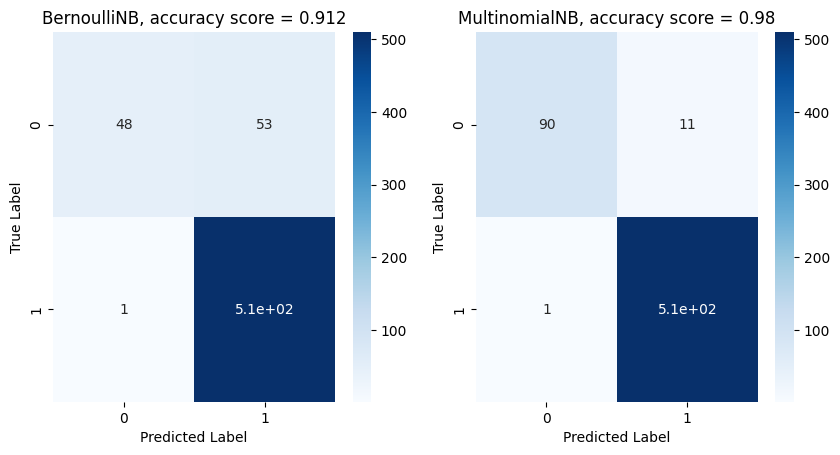

In [49]:
hamtrain, hamtest = train_test_split(easy_ham_list, train_size=0.8)
spamtrain, spamtest = train_test_split(spam_list, train_size=0.8)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham_list, train_size=0.8)


vectorizer = CountVectorizer(analyzer='word')

bNB = BernoulliNB()
mNB = MultinomialNB()

hamspam_train = vectorizer.fit_transform(hamtrain+spamtrain)

ham_result = [1 for _ in range(len(hamtrain))]
spam_result = [0 for _ in range(len(spamtrain))]

hamspam_result = np.array(ham_result+spam_result)

bNB.fit(hamspam_train, hamspam_result)
mNB.fit(hamspam_train, hamspam_result)


hamspam_test = vectorizer.transform(hamtest+spamtest)

ham_test_result = [1 for _ in range(len(hamtest))]
spam_test_result = [0 for _ in range(len(spamtest))]

hamspam_test_result = np.array(ham_test_result+spam_test_result)

bNB_score = bNB.score(hamspam_test, hamspam_test_result)
mNB_score = mNB.score(hamspam_test, hamspam_test_result)

fig, ax =plt.subplots(1,2)
fig.set_figwidth(10)



pred = bNB.predict(hamspam_test)
Bernoulli_CM = confusion_matrix(hamspam_test_result,pred)
sns.heatmap(Bernoulli_CM, annot=True, cmap='Blues',ax=ax[0]).set(title=f"BernoulliNB, accuracy score = {round(bNB_score,3)}",xlabel="Predicted Label",ylabel="True Label")
pred = mNB.predict(hamspam_test)
Multinomial_CM = confusion_matrix(hamspam_test_result,pred)
sns.heatmap(Multinomial_CM, annot=True, cmap='Blues',ax=ax[1]).set(title=f"MultinomialNB, accuracy score = {round(mNB_score,3)}",xlabel="Predicted Label",ylabel="True Label")
# tn, fp, fn, tp = Bernoulli_CM([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

# tpr = tp / (tp+fn)


TN = Bernoulli_CM[0][0]
FN = Bernoulli_CM[1][0]
TP = Bernoulli_CM[1][1]
FP = Bernoulli_CM[0][1]

    # Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
    # False negative rate
FNR = FN/(TP+FN)
print(f'The true positive rate for Bernoulli model is: {TPR}')
print(f'The false negative rate for Bernoulli model is: {FNR}')


TN = Multinomial_CM[0][0]
FN = Multinomial_CM[1][0]
TP = Multinomial_CM[1][1]
FP = Multinomial_CM[0][1]

    # Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
    # False negative rate
FNR = FN/(TP+FN)
print(f'The true positive rate for Multinominal model is: {TPR}')
print(f'The false negative rate for Multinominal model is: {FNR}')


### 3.Run on hard ham:
Run the two models from Question 2 on spam versus hard-ham and compare to easy-ham results.

BernouliNB : 
The true positive rate is: 0.38
The false negative rate is: 0.62
The false positive rate is: 0.4158415841584158
TN: 59  FN: 31  FP: 42  TP: 19
MultinominalNB : 
The true positive rate is: 0.38
The false negative rate is: 0.62
The false positive rate is: 0.04950495049504951
TN: 96  FN: 31  FP: 5  TP: 19


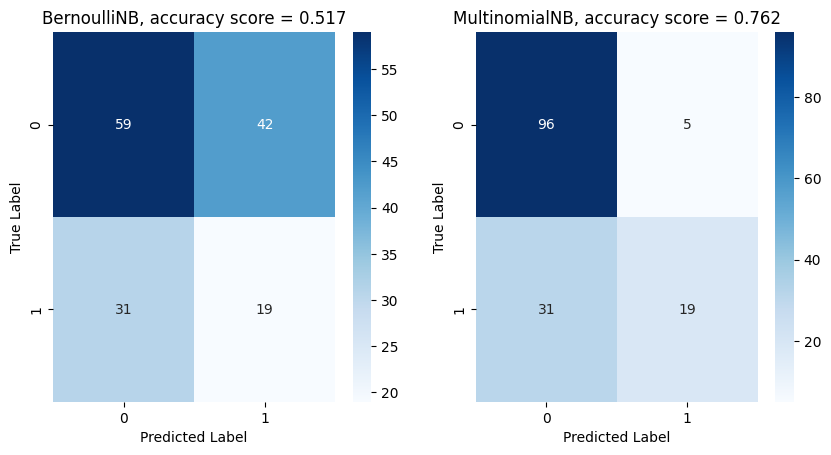

In [50]:

spamtrain, spamtest = train_test_split(spam_list, train_size=0.8)
hard_hamtrain, hard_hamtest = train_test_split(hard_ham_list, train_size=0.8)

hard_ham_result = [1 for _ in range(len(hard_hamtrain))]

spam_result = [0 for _ in range(len(spamtrain))]


hard_hamspam_result = np.array(hard_ham_result+spam_result)

hard_hamspam_test = vectorizer.transform(hard_hamtest+spamtest)

hard_ham_test_result = [1 for _ in range(len(hard_hamtest))]
spam_test_result = [0 for _ in range(len(spamtest))]

hard_hamspam_test_result = np.array(hard_ham_test_result+spam_test_result)

bNB_score = bNB.score(hard_hamspam_test, hard_hamspam_test_result)
mNB_score = mNB.score(hard_hamspam_test, hard_hamspam_test_result)

fig, ax =plt.subplots(1,2)
fig.set_figwidth(10)

pred = bNB.predict(hard_hamspam_test)
Bernoulli_CM = confusion_matrix(hard_hamspam_test_result,pred)
sns.heatmap(Bernoulli_CM, annot=True,cmap='Blues',ax=ax[0]).set(title=f"BernoulliNB, accuracy score = {round(bNB_score,3)}",xlabel="Predicted Label",ylabel="True Label")
pred = mNB.predict(hard_hamspam_test)
Multinomial_CM = confusion_matrix(hard_hamspam_test_result,pred)

sns.heatmap(Multinomial_CM, annot=True, cmap='Blues',ax=ax[1]).set(title=f"MultinomialNB, accuracy score = {round(mNB_score,3)}",xlabel="Predicted Label",ylabel="True Label")

TN = Bernoulli_CM[0][0]
FN = Bernoulli_CM[1][0]
TP = Bernoulli_CM[1][1]
FP = Bernoulli_CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# same as in title
accuracy = (TP + TN)/(TN+TP+FN+FP)
print("BernouliNB : ")
print(f'The true positive rate is: {TPR}')
print(f'The false negative rate is: {FNR}')
print(f'The false positive rate is: {FPR}')
print('TN:',TN,' FN:',FN,' FP:',FP,' TP:',TP)

TN = Multinomial_CM[0][0]
FN = Multinomial_CM[1][0]
TP = Multinomial_CM[1][1]
FP = Multinomial_CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# same as in title
accuracy = (TP + TN)/(TN+TP+FN+FP)
print("MultinominalNB : ")
print(f'The true positive rate is: {TPR}')
print(f'The false negative rate is: {FNR}')
print(f'The false positive rate is: {FPR}')

print('TN:',TN,' FN:',FN,' FP:',FP,' TP:',TP)



Answer: If we compare the results between the two sets of data there is a difference in performance. Both models were superior on the easyham dataset compared to the hardham dataset. Also the multinominal model performed better in both cases as you can see in the confusion matrices. The bernoulli model performed remarkably poorly on the hardham with an accuracy score of only ≈52%. 
We have printed the accuracy score in the titles. 

> What are the features that the trained models find important? How does the occurrence of these features differ in the hard- vs easy-ham data?

The features that the trained models find important should include specific words or phrases that are indicative of spam or ham emails. The occurrence of these features may differ in the hard- vs easy-ham data, and real ham emails in the hard-ham dataset probably contains more spam-like features, and real ham emails in the easy-ham emails potentially containing less spam-like features.

This makes it harder for the models identifying words and phrases in the real hard-ham data because those words also appear in the spam mails. Furthermore, the models are also only trained on the easy-ham dataset, this makes it less accurate in the case of hard-ham, because the differences in spam and hard-ham are smaller than in the case of easy-ham and spam. Something the model is not trained to distinguish. 

> 
What is a good model? Is maximizing the accuracy everything that we care about? Hint: accuracy=(TP+TN)/(P+N)

A good model is one that accurately predicts the outcomes of new data points based on patterns learned from the training data. Maximizing accuracy is an important goal, but it is not everything that we care about. A good model should be robust to changes in the input data or the environment. It should perform consistently across different datasets and should not be overly sensitive to outliers or noise.

Also, accuracy only tells us how many predictions were correct overall, but if we have multiple classes or datatypes it doesn't tell us how well the model performed for each class or datatype. In this particular exercise we might get a great accuracy score but only because we have a good TP rate, even though we have a poor TN rate. The importance of this vary for different types of tasks. For example, if we want to sort out spam mails it is super-important that we have a high TP rate. Otherwise real mails will end up in the spam folder, which is terrible if those mails were urgent/important. In the hard-ham dataset both models performed poorly. With accuracy below 40% most real mails will end up in the spam folder.

> 
What are the differences between Multinomial Bayes and Bernoulli Bayes? Some groups made some brief comments on the differences between the two. 

There are a few differences between Multinomial Naive Bayes and Bernoulli Naive Bayes. The first is that multinomial uses frequency counts, that is how often a feature is present, while Bernoulli uses binary features such if a feature is present or not. Partly because of this multinomial is commonly used for text classification while Bernoulli is often used for binary classification. 

In hard-ham data the false positive rate is much higher for the Bernoulli model(42%) compared to the multinominal(5%). This is most likely because of the similarity between the spam mails and real mails. Because this model does not take into account the frequency of which the words appear it is more likely to label spam mails as real mails.

> Can you elaborate on how this relates to the specific datasets here? Are there any specific instances where one could expect one to be better than the other?

Since Multinomial Naive Bayes uses word frequency counts as features, it may be more suitable for datasets with longer texts where the frequency of specific words can be informative for the classification task. But on the other hand, Bernoulli Naive Bayes uses binary features indicating the presence or absence of specific words. This may be more suitable for datasets where the presence or absence of specific words or features is more important than their frequency. For example, if a company want content moderation and filter out bad language in text or speech, the model should only care about the occurrence of "bad" words, and not how often they appear, and thus Bernoulli might be the preferred model.

On this specific dataset it is difficult to predict which model works best without testing, since it is a big dataset and the email varies in length and structure. That is why we have predicted with both model to get a better comparison and have stated the performance differences in the previous questions. 

> Why can't we use raw text for classification? How does CountVectorizer represent text features? Could this be improved (e.g. hint TFIDFVectorizer)

It is difficult to use raw text because it often contains a large amount of features and requires a lot of computational power to process. That is why you often must use preprocessing when analyzing text, and CountVectorizer is a good choice. However one limitation is that CountVectorizer only considers the frequency of each word, and not the importance of the word for distinguishing between different classes. This means that common words that appear in both spam and ham emails may be given too much weight and not help in distinguishing between them. This can be improved by using TFIDFVectorizer that also weighs each word by importance. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bb95fbe3-cd4e-4bba-86ba-6c87d113f92f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>